<a href="https://colab.research.google.com/github/dumbasspro0/Cardiovascular-Disease-Prediction/blob/main/Credit_card_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Title: Credit Card Fraud Detection**

**Project Overview**

The objective of this project is to build a machine learning model to detect fraudulent credit card transactions. Fraud detection is crucial for financial institutions and businesses to minimize losses and protect customers from unauthorized transactions. The dataset used in this project contains credit card transactions, with features that have been transformed using PCA for privacy reasons. The dataset is highly imbalanced, with a very small percentage of fraudulent transactions.

**Step 1: Data Preprocessing**

Objective: Prepare the dataset for analysis and modeling by handling missing values and scaling features.

In [1]:
from google.colab import files
uploaded = files.upload()

# Assuming the file is named 'creditcard.csv'
import pandas as pd

# Load the dataset
file_name = '/content/creditcard.csv'
data = pd.read_csv(file_name)

# Display the first few rows of the dataset
data.head()



Saving creditcard.csv to creditcard (1).csv


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


**Handling Missing Values:**

Check for any missing values in the dataset and handle them appropriately (e.g., imputation, removal)

In [5]:
missing_values = data.isnull().sum()
print(missing_values)


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


**Importing the required libraries**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve


**Feature Scaling:**

Normalize the features to ensure all variables contribute equally to the model performance.
Use StandardScaler from sklearn to scale the features.

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data.drop(columns=['Class']))
scaled_data = pd.DataFrame(scaled_features, columns=data.columns[:-1])
scaled_data['Class'] = data['Class']


**Step 2: Exploratory Data Analysis**

Objective: Gain insights into the dataset and visualize the relationships between features and the target variable.

**Class Distribution:**

Analyze the distribution of fraudulent and legitimate transactions to understand the class imbalance.

In [7]:
class_distribution = scaled_data['Class'].value_counts(normalize=True)
print(class_distribution)



Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64


**Visualizing Class Distribution:**

Plot the class distribution using Seaborn's countplot

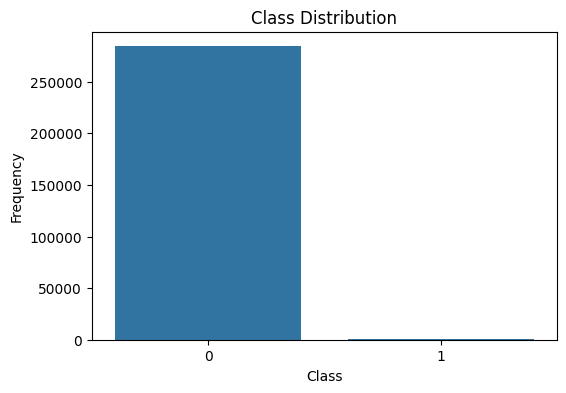

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=scaled_data)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()


**Correlation Analysis:**

Examine the correlations between features to identify any potential relationships.

Plot a correlation heatmap to visualize these relationships.
python


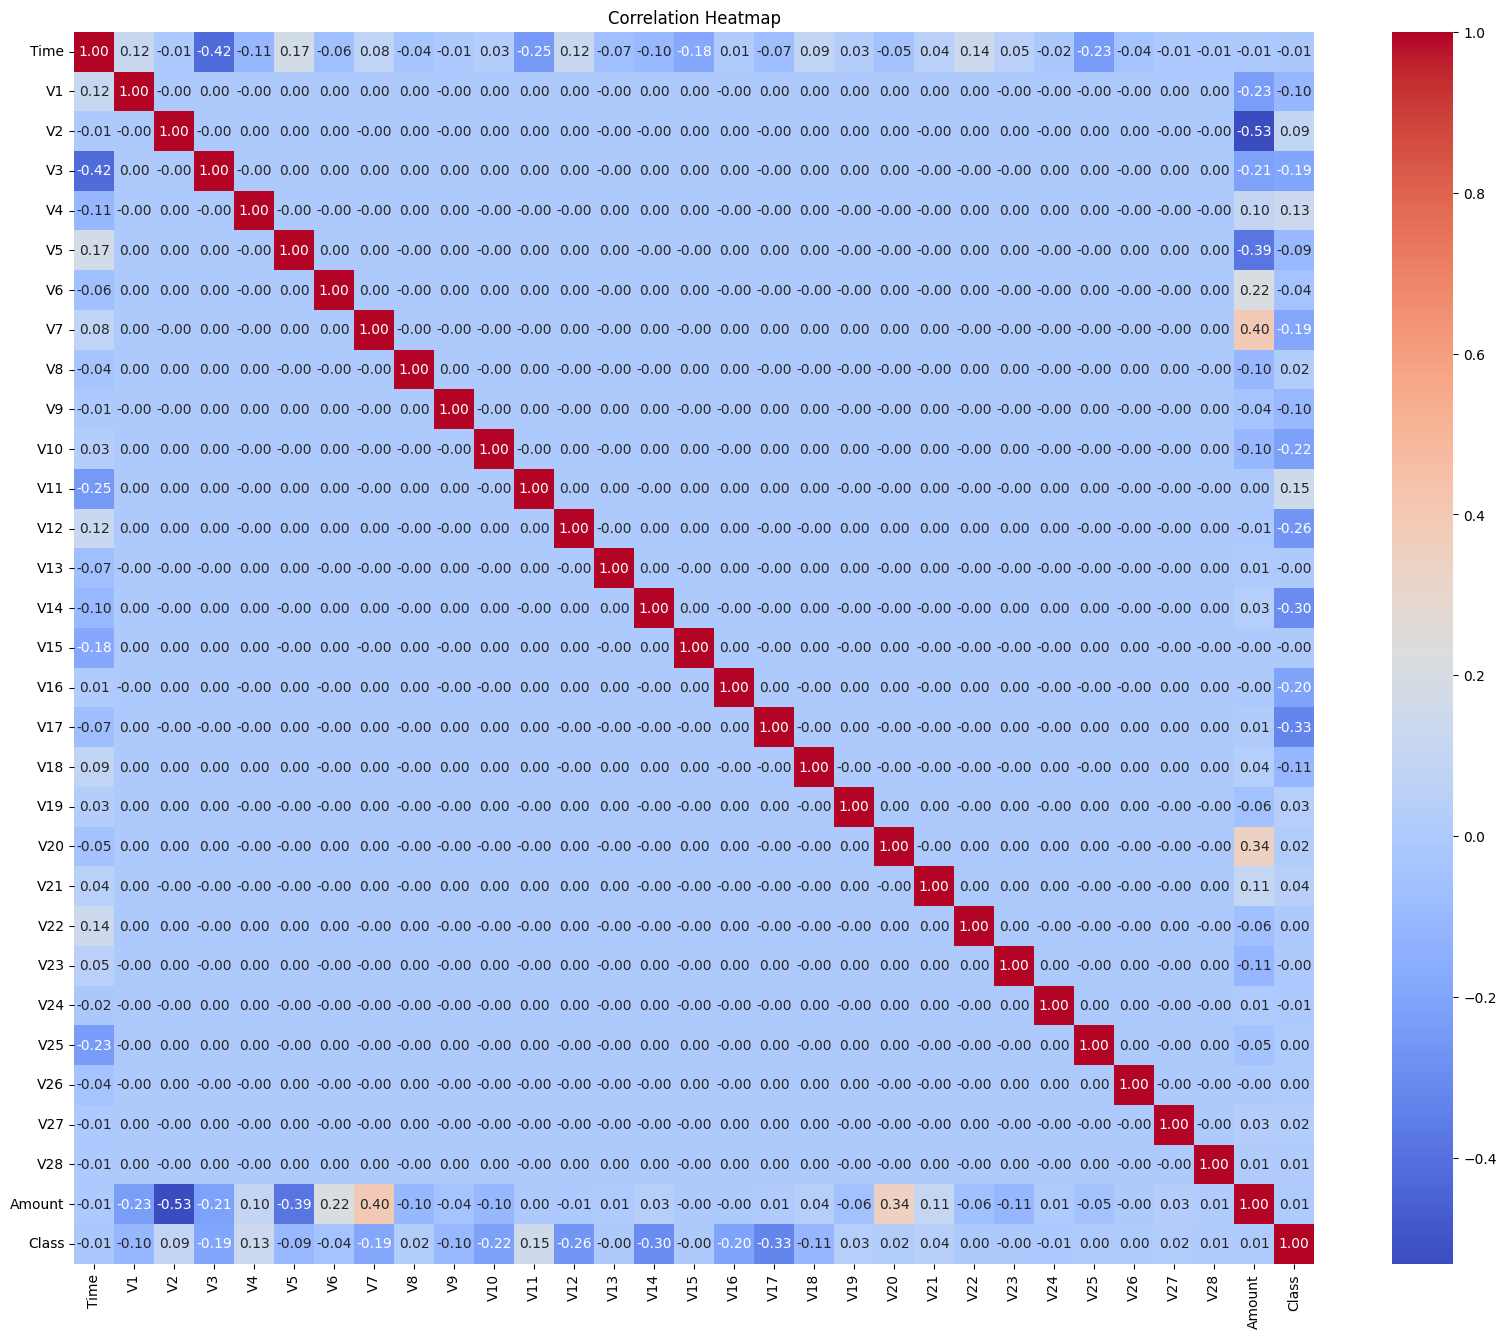

In [9]:
correlation_matrix = scaled_data.corr()
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


**Step 3: Model Training and Evaluation**

Objective: Build and evaluate a machine learning model to detect fraudulent transactions.

**Data Splitting:**

Split the data into training and testing sets to evaluate the model’s performance.

In [10]:
from sklearn.model_selection import train_test_split
X = scaled_data.drop(columns=['Class'])
y = scaled_data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


**Model Selection:**

Train a RandomForestClassifier, which is robust for this type of classification problem.

In [11]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

**Handling Imbalanced Data:**

Use techniques like SMOTE to address the class imbalance if necessary

In [12]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


**Model Evaluation:**

Evaluate the model using metrics such as accuracy, precision, recall, F1-score, and ROC AUC score.
Plot the ROC curve to visualize the model’s performance


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.96      0.76      0.85       148

    accuracy                           1.00     85443
   macro avg       0.98      0.88      0.92     85443
weighted avg       1.00      1.00      1.00     85443

Confusion Matrix:
 [[85290     5]
 [   36   112]]
ROC AUC Score: 0.9307385892839318


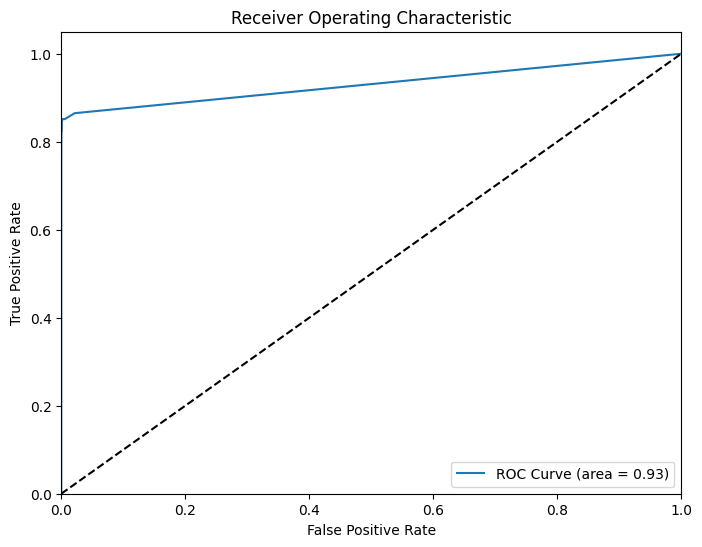

In [13]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_prob))

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc_score(y_test, y_pred_prob))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


**Step 4: Model Deployment**

Objective: Save the trained model for future use and optionally deploy it using a web interface.

**Save the Model:**

Save the trained model using joblib or pickle.

In [14]:
import joblib
joblib.dump(model, 'credit_card_fraud_model.pkl')


['credit_card_fraud_model.pkl']